In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install datasets
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
drive.flush_and_unmount()

In [ ]:
path_to_zip_file = "/content/drive/MyDrive/CV/mobile_images.zip"
extract_dir = "/content/drive/MyDrive/CV/images"
import zipfile
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [ ]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CV/out.csv")

In [ ]:
df.head()

,Label,Model,Brand,Condition,Image_File
0,apple iphone 7 portroid (used),iPhone 7,Apple,Used,mobile_images/1635051927882_Apple iPhone 7 Por...
1,apple iphone 6s 128gb (used),iPhone 6S,Apple,Used,mobile_images/1635051928230_Apple iPhone 6S 12...
2,samsung galaxy m02 (used),Galaxy M02,Samsung,Used,mobile_images/1635051928415_Samsung Galaxy M02...
3,lg q92 5g black snapdragon (new),Q92,LG,New,mobile_images/1635051928611_LG Q92 5G Black Sn...
4,apple iphone 7 128gb (used),iPhone 7,Apple,Used,mobile_images/1635051928818_Apple iPhone 7 128...


In [ ]:
IMG_URL = "/content/drive/MyDrive/CV/mobile_images/"

In [ ]:
# check stats of dataset
df.describe()

,Label,Model,Brand,Condition,Image_File
count,15087,15087,15087,15087,15087
unique,5779,496,35,2,15087
top,apple iphone 7 128gb (used),iPhone 7,Apple,Used,mobile_images/1635051927882_Apple iPhone 7 Por...
freq,372,1220,6398,12602,1


In [ ]:
# Checking the null values
df = df.dropna()
df.isnull().sum()

Label         0
Model         0
Brand         0
Condition     0
Image_File    0
dtype: int64

In [ ]:
def plot_12_random_images():
    _, axs = plt.subplots(3, 4, figsize=(12, 12))
    axs = axs.flatten()
    for ax in axs:
        idx = np.random.randint(0, len(df.index)-1)
        img = mpimg.imread(IMG_URL+df.iloc[idx]["Image_File"])
        ax.imshow(img)
        ax.set_xlabel(f"{df.iloc[idx]['Brand']} - {df.iloc[idx]['Model']}")
    plt.show()

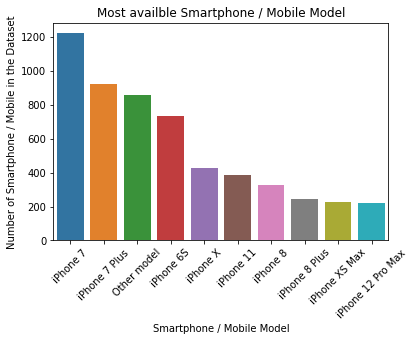

In [ ]:
# Most available Smartphone / Mobile Model

top_phon_type = df[["Image_File", "Model"]].groupby("Model").agg(['count'])['Image_File']['count'].sort_values(ascending=False)[:10]
fig = sns.barplot( x = top_phon_type.index, y = top_phon_type.values)
fig.set_xticklabels(labels=top_phon_type.index , rotation=45)
fig.set_ylabel("Number of Smartphone / Mobile in the Dataset")
fig.set_xlabel("Smartphone / Mobile Model")
fig.set_title("Most availble Smartphone / Mobile Model");

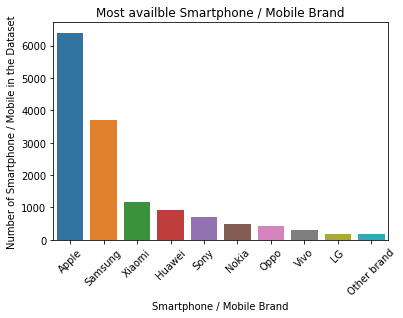

In [ ]:
# Most available Smartphone / Mobile Brands

top_phon_type = df[["Image_File", "Brand"]].groupby("Brand").agg(['count'])['Image_File']['count'].sort_values(ascending=False)[:10]
fig = sns.barplot( x = top_phon_type.index, y = top_phon_type.values)
fig.set_xticklabels(labels=top_phon_type.index , rotation=45)
fig.set_ylabel("Number of Smartphone / Mobile in the Dataset")
fig.set_xlabel("Smartphone / Mobile Brand")
fig.set_title("Most availble Smartphone / Mobile Brand");

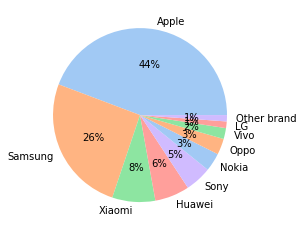

In [ ]:
# Disrtribution of Brands among the Dataset
colors = sns.color_palette('pastel')[0:5]
plt.pie(top_phon_type, labels = top_phon_type.index, colors = colors, autopct='%.0f%%')
plt.show()

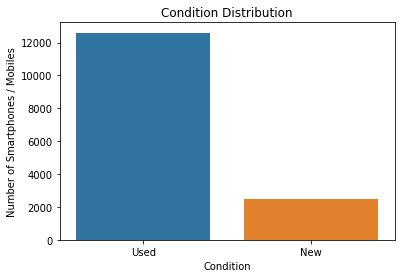

In [ ]:
# Disrtribution of Smartphone / Mobile by condition in the Dataset
fig = sns.countplot(data= df, x="Condition")
fig.set_ylabel("Number of Smartphones / Mobiles")
fig.set_xlabel("Condition")
fig.set_title("Condition Distribution");

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.Brand.value_counts()

Apple            6398
Samsung          3697
Xiaomi           1156
Huawei            931
Sony              711
Nokia             491
Oppo              431
Vivo              293
LG                177
Other brand       170
OnePlus           169
Realme            159
Google             75
Infinix            57
ZTE                29
HTC                24
Asus               22
Greentel           15
China Mobile       12
Moto               11
BlackBerry         10
Micromax            8
E-tel               7
Lenovo              6
Microsoft           4
Dialog              4
Sony Ericsson       4
Alcatel             3
Sky                 3
Ag-tel              2
i-mate              2
Acer                2
Zigo                2
Megagate            1
Dell                1
Name: Brand, dtype: int64

In [ ]:
# Filter out and consider images with only minimum pf 90 images
f, u = pd.factorize(df.Brand)
for i in f:
  if i < 0:
    print(i)

In [ ]:
df_filtered = df[np.bincount(f)[f] >= 90]

In [ ]:
df_filtered = df_filtered.sample(frac=1).reset_index(drop=True)
df_filtered = df_filtered.head(2000)

In [ ]:
from datasets import Dataset

dataset = Dataset.from_pandas(df_filtered)

In [ ]:
dataset = dataset.remove_columns(["Label", "Model", "Condition"])
dataset

Dataset({
    features: ['Brand', 'Image_File'],
    num_rows: 2000
})

In [ ]:
from PIL import Image
from datasets import Image as dsImage

image_column = []

i = 0

for entry in dataset:
  feature = dsImage(decode=False)
  print(i)
  i += 1
  image_column.append(feature.encode_example(Image.open(IMG_URL + entry["Image_File"])))
  #image_column.append(Image.open(IMG_URL + entry["Image_File"]))

dataset = dataset.add_column("image", image_column)
dataset[0]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

{'Brand': 'Other brand',
 'Image_File': 'mobile_images/1639536047597_Energize s500 Used for sale.jpg',
 'image': {'bytes': None,
  'path': '/content/drive/MyDrive/CV/mobile_images/mobile_images/1639536047597_Energize s500 Used for sale.jpg'}}

In [ ]:
dataset = dataset.remove_columns(["Image_File"])
dataset = dataset.rename_column("Brand", "label")
dataset

Dataset({
    features: ['label', 'image'],
    num_rows: 2000
})

In [ ]:
from datasets import ClassLabel, Sequence

label_names = sorted(set(dataset["label"]))
print(ClassLabel(names=label_names))
print(label_names)
# Cast to ClassLabel
dataset = dataset.cast_column("label", ClassLabel(names=label_names))

ClassLabel(names=['Apple', 'Huawei', 'LG', 'Nokia', 'OnePlus', 'Oppo', 'Other brand', 'Realme', 'Samsung', 'Sony', 'Vivo', 'Xiaomi'], id=None)
['Apple', 'Huawei', 'LG', 'Nokia', 'OnePlus', 'Oppo', 'Other brand', 'Realme', 'Samsung', 'Sony', 'Vivo', 'Xiaomi']


Casting the dataset:   0%|          | 0/2 [00:00<?, ?ba/s]

In [ ]:
dataset = dataset.train_test_split(test_size=0.2)

In [ ]:
dataset["train"][0]

{'label': 8,
 'image': {'bytes': None,
  'path': '/content/drive/MyDrive/CV/mobile_images/mobile_images/1638395042080_Samsung Galaxy M02 Used for sale.jpg'}}

In [ ]:
print(dataset["train"].features["label"])
labels = dataset["train"].features["label"].names
label2id, id2label = dict(), dict()
for i, label in enumerate(labels):
    label2id[label] = str(i)
    id2label[str(i)] = label

ClassLabel(names=['Apple', 'Huawei', 'LG', 'Nokia', 'OnePlus', 'Oppo', 'Other brand', 'Realme', 'Samsung', 'Sony', 'Vivo', 'Xiaomi'], id=None)


In [ ]:
id2label[str(0)]

'Apple'

In [ ]:
from transformers import AutoImageProcessor

image_processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")

loading configuration file preprocessor_config.json from cache at /root/.cache/huggingface/hub/models--google--vit-base-patch16-224-in21k/snapshots/1ba429d32753f33a0660b80ac6f43a3c80c18938/preprocessor_config.json
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--google--vit-base-patch16-224-in21k/snapshots/1ba429d32753f33a0660b80ac6f43a3c80c18938/config.json
Model config ViTConfig {
  "_name_or_path": "google/vit-base-patch16-224-in21k",
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.25.1"
}

{param_name} should be a dictionary on of the followi

In [ ]:
from torchvision.transforms import RandomResizedCrop, Compose, Normalize, ToTensor

normalize = Normalize(mean=image_processor.image_mean, std=image_processor.image_std)
size = (
    image_processor.size["shortest_edge"]
    if "shortest_edge" in image_processor.size
    else (image_processor.size["height"], image_processor.size["width"])
)
_transforms = Compose([RandomResizedCrop(size), ToTensor(), normalize])

In [ ]:
def transforms(examples):
    examples["pixel_values"] = [_transforms(Image.open(img["path"]).convert("RGB")) for img in examples["image"]]
    del examples["image"]
    return examples

In [ ]:
dataset = dataset.with_transform(transforms)

In [ ]:
from transformers import DefaultDataCollator

data_collator = DefaultDataCollator()

In [ ]:
import evaluate

accuracy = evaluate.load("accuracy")

In [ ]:
import numpy as np


def compute_metrics(eval_pred):
    predictions = np.argmax(eval_pred.predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=eval_pred.label_ids)

In [ ]:
from transformers import AutoModelForImageClassification, TrainingArguments, Trainer

model = AutoModelForImageClassification.from_pretrained(
    "google/vit-base-patch16-224-in21k",
    num_labels=len(labels),
    id2label=id2label,
    label2id=label2id,
)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--google--vit-base-patch16-224-in21k/snapshots/1ba429d32753f33a0660b80ac6f43a3c80c18938/config.json
Model config ViTConfig {
  "_name_or_path": "google/vit-base-patch16-224-in21k",
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "id2label": {
    "0": "Apple",
    "1": "Huawei",
    "10": "Vivo",
    "11": "Xiaomi",
    "2": "LG",
    "3": "Nokia",
    "4": "OnePlus",
    "5": "Oppo",
    "6": "Other brand",
    "7": "Realme",
    "8": "Samsung",
    "9": "Sony"
  },
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "Apple": "0",
    "Huawei": "1",
    "LG": "2",
    "Nokia": "3",
    "OnePlus": "4",
    "Oppo": "5",
    "Other brand": "6",
    "Realme": "7",
    "Samsung": "8",
    "Sony": "9",
    "Vivo": "10",
    "X

In [ ]:
import torch

training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/CV/output_final",
    remove_unused_columns=False,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=16,
    gradient_accumulation_steps=4,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    warmup_ratio=0.1,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy"
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    tokenizer=image_processor,
    compute_metrics=compute_metrics,
)

trainer.train()

torch.save(model, '/content/drive/MyDrive/CV/vit-base-patch16-224-in21k_final')

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 1600
  Num Epochs = 3
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 4
  Total optimization steps = 75
  Number of trainable parameters = 85807884


Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss,Accuracy
1,2.087200,1.797143,0.457500
2,1.730200,1.675238,0.487500
3,1.645200,1.640816,0.525000


***** Running Evaluation *****
  Num examples = 400
  Batch size = 16
Saving model checkpoint to /content/drive/MyDrive/CV/output_final/checkpoint-25
Configuration saved in /content/drive/MyDrive/CV/output_final/checkpoint-25/config.json
Model weights saved in /content/drive/MyDrive/CV/output_final/checkpoint-25/pytorch_model.bin
Image processor saved in /content/drive/MyDrive/CV/output_final/checkpoint-25/preprocessor_config.json
***** Running Evaluation *****
  Num examples = 400
  Batch size = 16
Saving model checkpoint to /content/drive/MyDrive/CV/output_final/checkpoint-50
Configuration saved in /content/drive/MyDrive/CV/output_final/checkpoint-50/config.json
Model weights saved in /content/drive/MyDrive/CV/output_final/checkpoint-50/pytorch_model.bin
Image processor saved in /content/drive/MyDrive/CV/output_final/checkpoint-50/preprocessor_config.json
***** Running Evaluation *****
  Num examples = 400
  Batch size = 16
Saving model checkpoint to /content/drive/MyDrive/CV/output_

In [ ]:
loaded_model = torch.load('/content/drive/MyDrive/CV/vit-base-patch16-224-in21k_final')

In [ ]:
labels = ['Apple', 'Huawei', 'LG', 'Nokia', 'OnePlus', 'Oppo', 'Other brand', 'Realme', 'Samsung', 'Sony', 'Vivo', 'Xiaomi']
label2id, id2label = dict(), dict()
for i, label in enumerate(labels):
    label2id[label] = str(i)
    id2label[str(i)] = label

In [ ]:
from transformers import pipeline

classifier = pipeline("image-classification", model="/content/drive/MyDrive/CV/output_final/checkpoint-75")
classifier

loading configuration file /content/drive/MyDrive/CV/output_final/checkpoint-75/config.json
Model config ViTConfig {
  "_name_or_path": "/content/drive/MyDrive/CV/output_final/checkpoint-75",
  "architectures": [
    "ViTForImageClassification"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "id2label": {
    "0": "Apple",
    "1": "Huawei",
    "2": "LG",
    "3": "Nokia",
    "4": "OnePlus",
    "5": "Oppo",
    "6": "Other brand",
    "7": "Realme",
    "8": "Samsung",
    "9": "Sony",
    "10": "Vivo",
    "11": "Xiaomi"
  },
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "Apple": "0",
    "Huawei": "1",
    "LG": "2",
    "Nokia": "3",
    "OnePlus": "4",
    "Oppo": "5",
    "Other brand": "6",
    "Realme": "7",
    "Samsung": "8",
    "Sony": "9",
    "Vivo": "10",
    "Xiaomi": "11"
  },
  "layer_norm_eps": 1e-12,
  "model_type":

In [ ]:
idx = np.random.randint(0, len(df.index)-1)
testimguri = IMG_URL+df.iloc[idx]["Image_File"]
print(testimguri)
classifier(Image.open(testimguri))

/content/drive/MyDrive/CV/mobile_images/mobile_images/1639531402590_Nokia 54 New for sale.jpg


[{'score': 0.36594894528388977, 'label': 'Apple'},
 {'score': 0.2112736999988556, 'label': 'Samsung'},
 {'score': 0.07943733036518097, 'label': 'Xiaomi'},
 {'score': 0.06399524956941605, 'label': 'Huawei'},
 {'score': 0.058558449149131775, 'label': 'Sony'}]